In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

## EDA

### Carga de datos

In [263]:
games = pd.read_csv('games.csv',delimiter=';')

In [5]:
reviews = pd.read_csv('reviews.csv')

In [9]:
items = pd.read_csv('items.csv')

### Analisis de Games

In [29]:
games.head()

,genres,item_name,tags,specs,price,early_access,item_id,developer,release_year
0,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",['Single-player'],4.99,0.0,761140.0,Kotoshiro,2018.0
1,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...","['Single-player', 'Multi-player', 'Online Mult...",0.00,0.0,643980.0,Secret Level SRL,2018.0
2,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,"['Free to Play', 'Simulation', 'Sports', 'Casu...","['Single-player', 'Multi-player', 'Online Mult...",0.00,0.0,670290.0,Poolians.com,2017.0
3,"['Action', 'Adventure', 'Casual']",弹炸人2222,"['Action', 'Adventure', 'Casual']",['Single-player'],0.99,0.0,767400.0,彼岸领域,2017.0
4,NaN,Log Challenge,"['Action', 'Indie', 'Casual', 'Sports']","['Single-player', 'Full controller support', '...",2.99,0.0,773570.0,NaN,NaN


In [49]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32131 entries, 0 to 32130
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        28849 non-null  object 
 1   item_name     32131 non-null  object 
 2   tags          31969 non-null  object 
 3   specs         31462 non-null  object 
 4   price         30755 non-null  float64
 5   early_access  32131 non-null  float64
 6   item_id       32131 non-null  float64
 7   developer     28834 non-null  object 
 8   release_year  29961 non-null  float64
dtypes: float64(4), object(5)
memory usage: 2.2+ MB


In [40]:
games['genres'] = games['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
games['tags'] = games['tags'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
games['specs'] = games['specs'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [82]:
#Crea una lista con todos los unicos de las listas de una columna
def frec_unicos(col):
    u = []
    for sublist in col:
        if type(sublist)==list:
            for genre in sublist:
                u.append(genre)
    return pd.Series(u).value_counts()

#### Genres

In [122]:
games

,genres,item_name,tags,specs,price,early_access,item_id,developer,release_year
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,0.0,761140.0,Kotoshiro,2018.0
1,"[Free to Play, Indie, RPG, Strategy]",Ironbound,"[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",0.00,0.0,643980.0,Secret Level SRL,2018.0
2,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,"[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",0.00,0.0,670290.0,Poolians.com,2017.0
3,"[Action, Adventure, Casual]",弹炸人2222,"[Action, Adventure, Casual]",[Single-player],0.99,0.0,767400.0,彼岸领域,2017.0
4,NaN,Log Challenge,"[Action, Indie, Casual, Sports]","[Single-player, Full controller support, HTC V...",2.99,0.0,773570.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32126,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,"[Strategy, Indie, Casual, Simulation]","[Single-player, Steam Achievements]",1.99,0.0,773640.0,"Nikita ""Ghost_RUS""",2018.0
32127,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,"[Strategy, Indie, Casual]","[Single-player, Steam Achievements, Steam Clou...",4.99,0.0,733530.0,Sacada,2018.0
32128,"[Indie, Racing, Simulation]",Russian Roads,"[Indie, Simulation, Racing]","[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660.0,Laush Dmitriy Sergeevich,2018.0
32129,"[Casual, Indie]",EXIT 2 - Directions,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...","[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870.0,"xropi,stev3ns",2017.0


In [123]:
lista_genres=frec_unicos(games['genres'])

In [124]:
lista_genres

Indie                        15857
Action                       11318
Casual                        8282
Adventure                     8242
Strategy                      6957
Simulation                    6699
RPG                           5479
Free to Play                  2031
Early Access                  1462
Sports                        1257
Massively Multiplayer         1108
Racing                        1083
Design &amp; Illustration      460
Utilities                      340
Web Publishing                 268
Animation &amp; Modeling       183
Education                      125
Video Production               116
Software Training              105
Audio Production                93
Photo Editing                   77
Accounting                       7
Name: count, dtype: int64

In [196]:
lista_genres.size

22

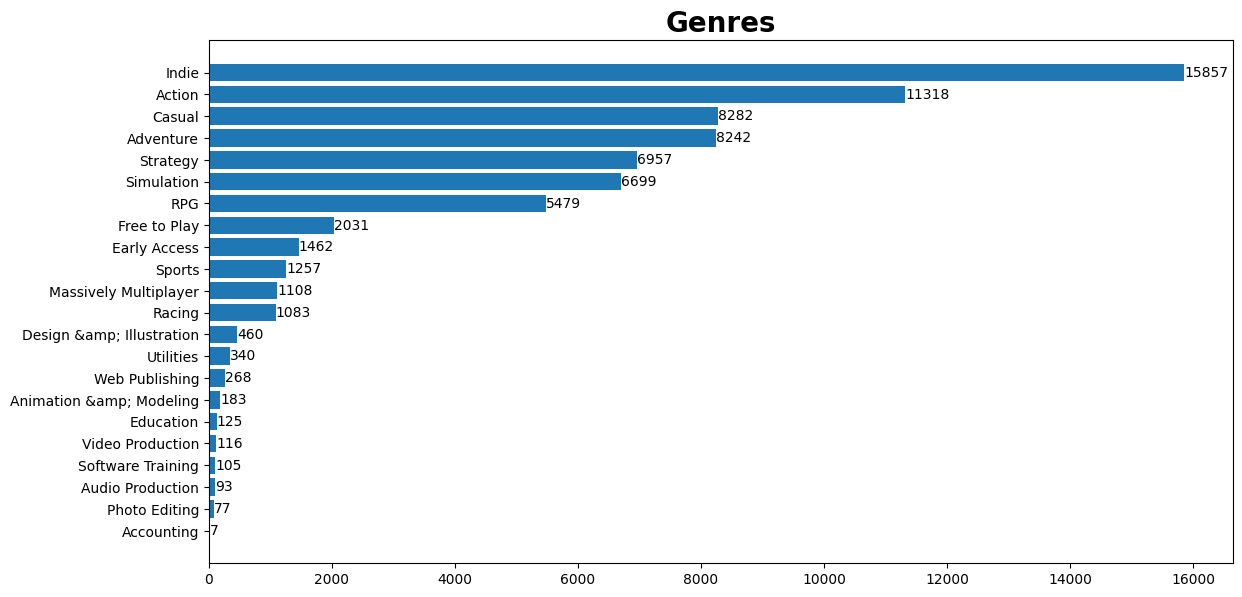

In [179]:
plt.subplots_adjust(left=0.2, right=1.8,top=1.2)
plt.barh(lista_genres.index,lista_genres.values)
plt.gca().invert_yaxis()
plt.title('Genres', fontweight = 'bold',fontsize=20)
for index, value in enumerate(lista_genres.values):
    plt.text(value, index, str(value), va='center')
plt.show()

#### Item_name

In [180]:
np.size(games['item_name'].unique())

32094

In [188]:
games['item_name'].value_counts().head(10)

item_name
Soundtrack                 3
Escape Room                2
Taxi                       2
WARZONE                    2
Total Extreme Wrestling    2
Colony                     2
Dark Matter                2
Invasion                   2
Alter Ego                  2
Castles                    2
Name: count, dtype: int64

In [187]:
games[games.duplicated(subset=['item_name'])].size

333

#### Tags

In [192]:
lista_tags=frec_unicos(games['tags'])

In [193]:
lista_tags

Indie            17619
Action           13002
Adventure         9829
Casual            9739
Simulation        7730
                 ...  
Underground          6
Cycling              5
Voice Control        5
Faith                4
Bikes                2
Name: count, Length: 339, dtype: int64

In [194]:
lista_tags.size

339

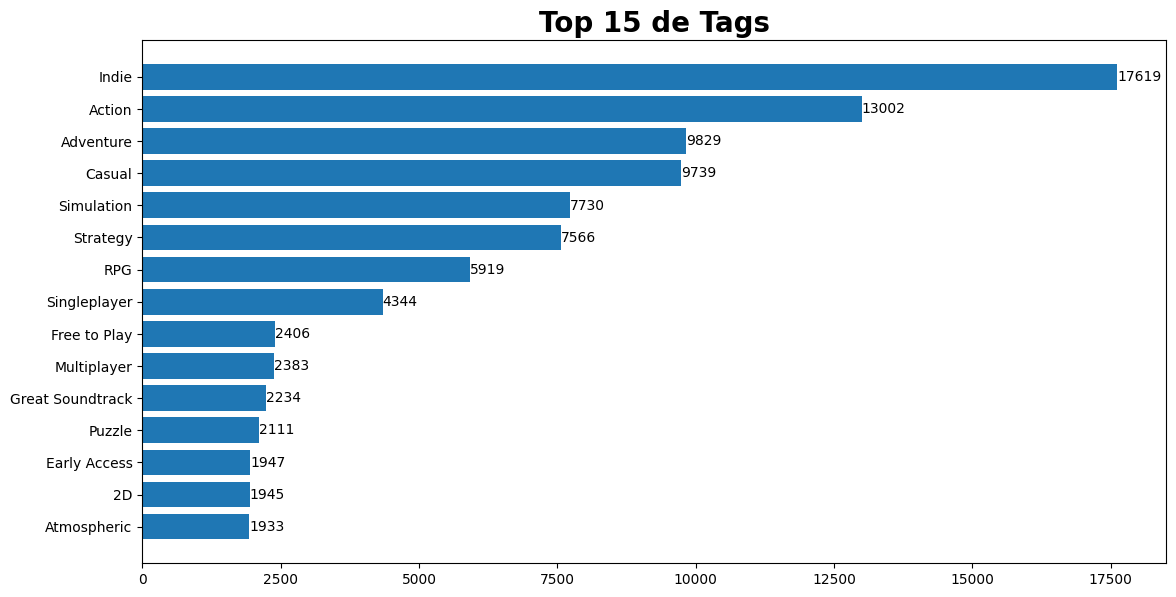

In [205]:
plt.subplots_adjust(left=0.2, right=1.8,top=1.2)
plt.barh(lista_tags.head(15).index,lista_tags.head(15).values)
plt.gca().invert_yaxis()
plt.title('Top 15 de Tags', fontweight = 'bold',fontsize=20)
for index, value in enumerate(lista_tags.head(15).values):
    plt.text(value, index, str(value), va='center')
plt.show()

#### Specs

In [200]:
lista_specs=frec_unicos(games['specs'])

In [201]:
lista_specs

Single-player                 27574
Steam Achievements            16364
Downloadable Content          12691
Steam Trading Cards           12198
Steam Cloud                    9958
Multi-player                   8198
Full controller support        7384
Partial Controller Support     6538
Steam Leaderboards             6081
Co-op                          4280
Shared/Split Screen            3962
Cross-Platform Multiplayer     2550
Online Multi-Player            2370
Stats                          2321
HTC Vive                       1984
Steam Workshop                 1866
Tracked Motion Controllers     1816
Captions available             1643
Standing                       1462
Room-Scale                     1445
Includes level editor          1377
Local Multi-Player             1237
Oculus Rift                    1213
Seated                         1090
Online Co-op                    998
MMO                             942
In-App Purchases                933
Local Co-op                 

In [202]:
lista_specs.size

40

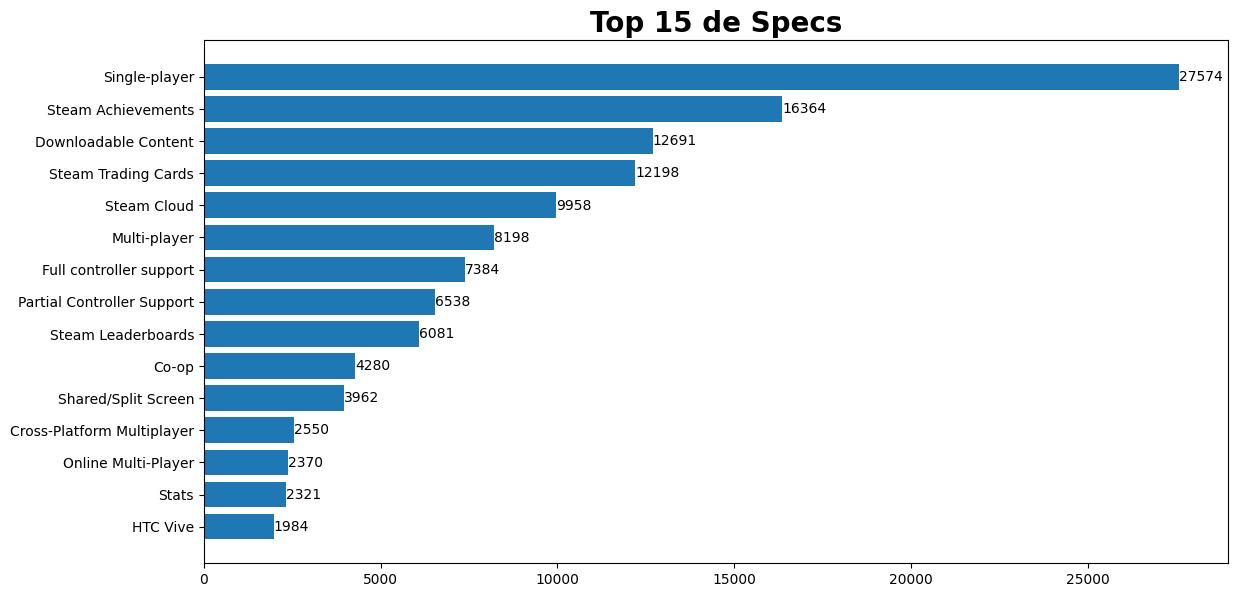

In [206]:
plt.subplots_adjust(left=0.2, right=1.8,top=1.2)
plt.barh(lista_specs.head(15).index,lista_specs.head(15).values)
plt.gca().invert_yaxis()
plt.title('Top 15 de Specs', fontweight = 'bold',fontsize=20)
for index, value in enumerate(lista_specs.head(15).values):
    plt.text(value, index, str(value), va='center')
plt.show()

#### Price

In [16]:
games['price'].describe()

count    30755.000000
mean         8.895293
std         16.338786
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

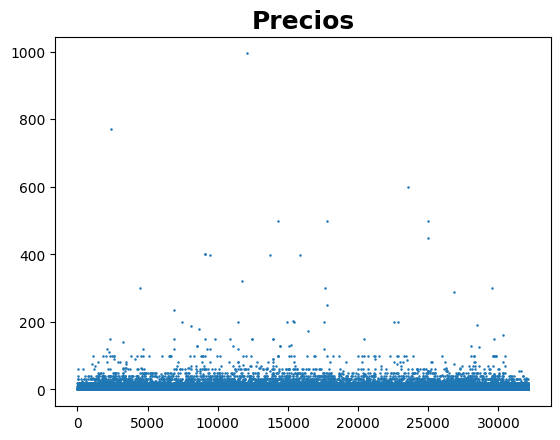

In [231]:
plt.plot(games['price'],'o',markersize=0.8)
plt.title('Precios', fontweight = 'bold',fontsize=18)
plt.show()

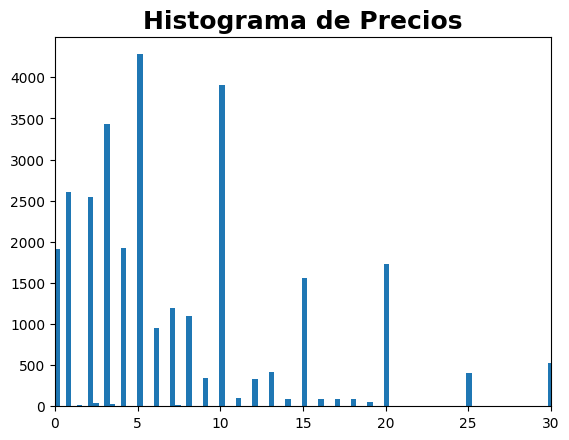

In [255]:
plt.hist(games['price'],bins=3000)
plt.title('Histograma de Precios', fontweight = 'bold',fontsize=18)
plt.xlim(0,30)
plt.show()

##### Analisis de BoxPlot

In [239]:
#Calculo de bigotes
Q3 = float(games['price'].quantile(0.75))
Q1 = float(games['price'].quantile(0.25))
RIC = Q3 - Q1

min_price = Q1 - 1.5*RIC
if min_price < min(games['price']):
    min_price = min(games['price'])
max_price = Q3 + 1.5*RIC
if max_price > max(games['price']):
    max_price = max(games['price'])

min_price, max_price

(0.0, 20.490000000000002)

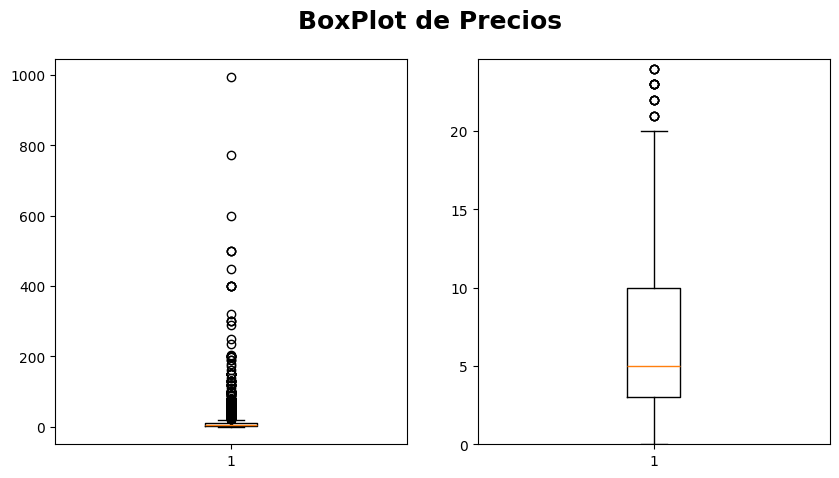

In [256]:
fig, ax = plt.subplots(1, 2,figsize = (10,5))
fig.suptitle('BoxPlot de Precios',fontsize=18, fontweight='bold')

ax[0].boxplot(games['price'].dropna())

ax[1].boxplot(games['price'].dropna())
ax[1].set_ylim(min_price*0.8, max_price*1.2)

plt.show()

In [268]:
print('Cantidad de outliers:', games[games['price']>=max_price].size)
print('Porcentaje de outliers:',(games[games['price']>=max_price].size/games.size)*100,'%')

Cantidad de outliers: 16956
Porcentaje de outliers: 5.863496311972861 %


In [269]:
print('Cantidad de outliers:', games[games['price']>=max_price].size)

Cantidad de outliers: 16956


In [277]:
print('Cantidad de outliers:', games[games['price']>=max_price].shape[0])
print('Porcentaje de outliers:',(games[games['price']>=max_price].shape[0]/games.shape[0])*100,'%')

Cantidad de outliers: 1884
Porcentaje de outliers: 5.863496311972861 %


In [267]:
games[games['price']>=max_price]

,genres,item_name,tags,specs,price,early_access,item_id,developer,release_year
8,"['Free to Play', 'Indie', 'Simulation', 'Sports']",SNOW - All Access Legend Pass,"['Free to Play', 'Indie', 'Simulation', 'Sports']","['Single-player', 'Multi-player', 'Online Mult...",29.99,0.0,774278.0,Poppermost Productions,2018.0
18,"['Free to Play', 'Indie', 'Simulation', 'Sports']",SNOW - Lifetime Pack,"['Free to Play', 'Indie', 'Simulation', 'Sports']","['Single-player', 'Multi-player', 'Online Mult...",59.99,0.0,774279.0,Poppermost Productions,2018.0
51,NaN,Medicalholodeck Personal Version,['Education'],"['Tracked Motion Controllers', 'Seated', 'Stan...",29.99,0.0,769350.0,NaN,NaN
59,['Racing'],RACE - The WTCC Game,"['Racing', 'Simulation']","['Single-player', 'Multi-player']",39.99,0.0,4230.0,SimBin,2006.0
233,"['Massively Multiplayer', 'RPG']",Guild Wars Trilogy,"['RPG', 'Massively Multiplayer', 'MMORPG', 'PvP']","['Multi-player', 'MMO']",29.99,0.0,29570.0,ArenaNet®,2008.0
...,...,...,...,...,...,...,...,...,...
31934,"['RPG', 'Simulation']",愛神餐館2,"['RPG', 'Simulation', 'Anime']",['Single-player'],34.99,0.0,769680.0,Firedog Creative Company Limited,2017.0
31952,NaN,Three Kingdoms VR - Jade Knight (光之三國VR - 青龍騎),"['Action', 'Casual', 'Simulation', 'Sports']","['Single-player', 'Steam Achievements', 'Steam...",24.99,0.0,731120.0,NaN,NaN
31955,"['Massively Multiplayer', 'Racing', 'Simulatio...",CarX Drift Racing Online - Deluxe,"['Massively Multiplayer', 'Simulation', 'Racin...","['Single-player', 'Multi-player', 'Online Mult...",29.99,0.0,776950.0,CarX Technologies,2017.0
32066,"['Action', 'Adventure', 'Casual', 'Indie', 'Si...",Mesozoica,"['Early Access', 'Simulation', 'Strategy', 'Ca...",['Single-player'],29.99,1.0,719590.0,"DreamInCode B.V.,Squadron Interactive",2018.0


In [293]:
pd.set_option('display.max_rows', None)
print(games['price'].value_counts().sort_index(ascending=True))

price
0.00      1908
0.49         2
0.50         1
0.89         1
0.95         1
0.98         2
0.99      2607
1.00         4
1.25         3
1.29         2
1.39         1
1.49         9
1.50         1
1.59         3
1.87         1
1.95         1
1.99      2541
2.00         3
2.30         1
2.49        38
2.66         1
2.89         1
2.97         1
2.99      3429
3.00         1
3.33         2
3.39         1
3.49        19
3.99      1918
4.00         1
4.29         1
4.49         4
4.68         1
4.99      4278
5.00         2
5.49         7
5.65         1
5.99       948
6.00         1
6.48         1
6.49         1
6.66         1
6.99      1199
7.00         1
7.49        11
7.99      1095
8.98         1
8.99       347
9.00         1
9.69         1
9.95         1
9.98         1
9.99      3902
10.00        5
10.49        1
10.93        1
10.96        1
10.99       93
11.15        1
11.99      331
12.00        1
12.89        1
12.99      417
13.37        1
13.98        1
13.99       92
14.9

In [292]:
pd.reset_option('display.max_rows')

In [261]:
games.drop(games[games['price']>=max_price].index,inplace=True)

#### Early_access

#### Developer

In [141]:
np.size(games['developer'].unique())

10993

In [150]:
games['developer'].value_counts()

developer
Ubisoft - San Francisco       1259
SmiteWorks USA, LLC            813
Dovetail Games                 253
KOEI TECMO GAMES CO., LTD.     232
Paradox Development Studio     156
                              ... 
Tony Wang                        1
Trokardia                        1
Sai Attack                       1
Cyber Prophet                    1
Wrecked Angle Studios            1
Name: count, Length: 10992, dtype: int64

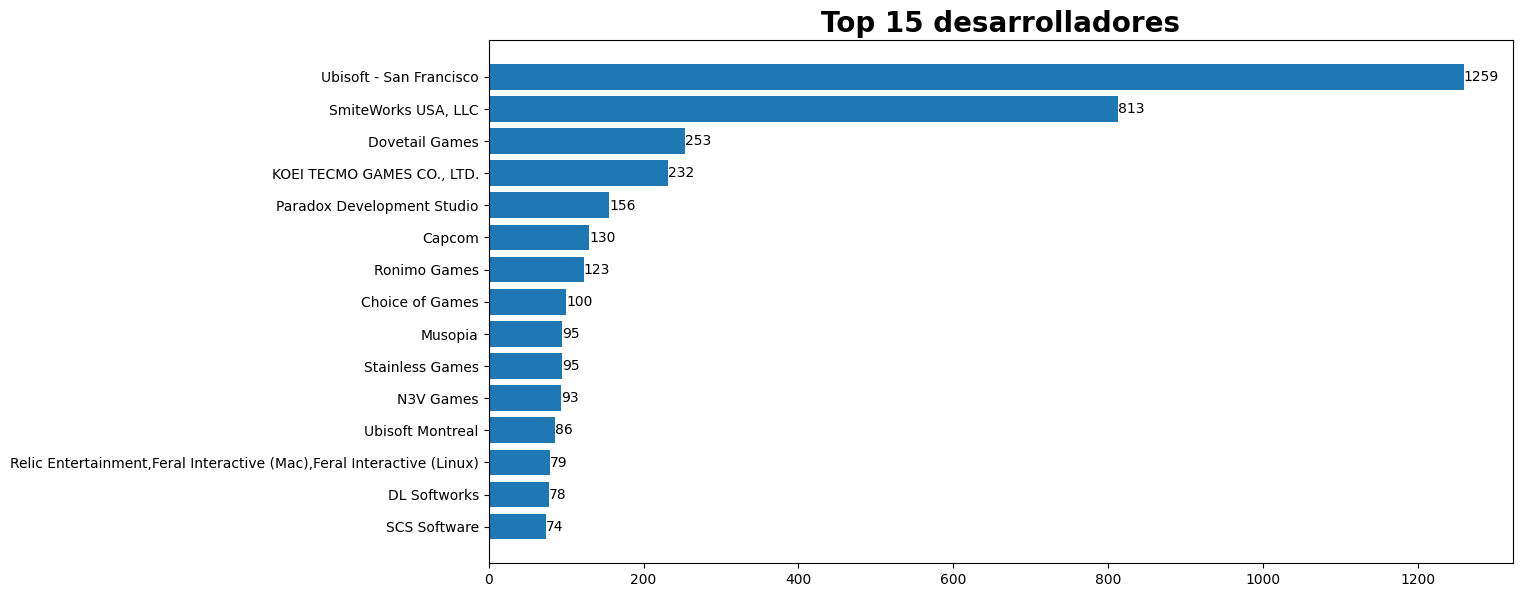

In [178]:
plt.subplots_adjust(left=0.2, right=1.8,top=1.2)
plt.barh(games['developer'].dropna().value_counts().head(15).index,games['developer'].dropna().value_counts().head(15).values)
plt.gca().invert_yaxis()
plt.title('Top 15 desarrolladores', fontweight = 'bold',fontsize=20)
for index, value in enumerate(games['developer'].dropna().value_counts().head(15).values):
    plt.text(value, index, str(value), va='center')
plt.show()

#### Release_year

### Analisis de Reviews

In [7]:
reviews.head()

,user_id,item_id,recommend,review
0,76561197970982479,1250.0,True,Simple yet with great replayability. In my opi...
1,76561197970982479,22200.0,True,It's unique and worth a playthrough.
2,76561197970982479,43110.0,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,251610.0,True,I know what you think when you see this title ...
4,js41637,227300.0,True,For a simple (it's actually not all that simpl...


In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58431 entries, 0 to 58430
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    58431 non-null  object 
 1   item_id    58431 non-null  float64
 2   recommend  58431 non-null  bool   
 3   review     58401 non-null  object 
dtypes: bool(1), float64(1), object(2)
memory usage: 1.4+ MB


### Analisis de Items

In [10]:
items.head()

,user_id,items_count,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,10.0,Counter-Strike,6.0,0.0
1,76561197970982479,277,20.0,Team Fortress Classic,0.0,0.0
2,76561197970982479,277,30.0,Day of Defeat,7.0,0.0
3,76561197970982479,277,40.0,Deathmatch Classic,0.0,0.0
4,76561197970982479,277,50.0,Half-Life: Opposing Force,0.0,0.0


In [11]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094105 entries, 0 to 5094104
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   items_count       int64  
 2   item_id           float64
 3   item_name         object 
 4   playtime_forever  float64
 5   playtime_2weeks   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 233.2+ MB
